# K線型態哪種最有用？
http://thepatternsite.com/CandleEntry.html

## 取得價格資料、計算獲利

In [1]:
from finlab.data import Data

data = Data()
open_adj = data.get_adj('開盤價')  # 考慮除權息、增減資
open_adj.head() # 沒有unstack

stock_id,0015,0050,0051,0052,0053,0054,0055,0056,0057,0058,...,9944,9945,9946,9949,9950,9951,9955,9958,9960,9962
date,,,,,,,,,,,,,,,,,,,,,
2007-04-23,9.45,57.55,32.90,38.05,NaN,NaN,NaN,NaN,NaN,NaN,...,31.00,30.05,10.20,71.0,13.35,50.3,74.5,NaN,46.5,50.6
2007-04-24,9.54,57.90,32.83,38.40,NaN,NaN,NaN,NaN,NaN,NaN,...,30.90,30.80,10.00,74.0,13.10,51.1,72.5,NaN,45.8,49.8
2007-04-25,9.50,57.80,32.81,38.50,NaN,NaN,NaN,NaN,NaN,NaN,...,32.50,30.50,9.97,75.9,13.20,50.4,72.0,NaN,46.1,50.1
2007-04-26,9.53,57.95,32.90,38.70,NaN,NaN,NaN,NaN,NaN,NaN,...,32.50,29.50,10.00,75.0,13.20,49.7,71.8,NaN,49.5,49.0
2007-04-27,9.55,57.70,32.80,38.60,NaN,NaN,NaN,NaN,NaN,NaN,...,31.75,29.00,11.10,75.0,13.30,49.1,71.2,NaN,48.5,47.7


In [2]:
from finlab.data import Data

data = Data()
open_adj = data.get_adj('開盤價')  # 考慮除權息、增減資

profit1 =  open_adj.shift(-2) / open_adj.shift(-1)  # 今天晚上看到，明天買入，後天賣出得到每一列的報酬率
profit5 =  open_adj.shift(-6) / open_adj.shift(-1)
profit10 = open_adj.shift(-11) / open_adj.shift(-1)
profit60 = open_adj.shift(-61) / open_adj.shift(-1)

profit1 = profit1.unstack()
profit5 = profit5.unstack()
profit10 = profit10.unstack()
profit60 = profit60.unstack()
profit60.head()

stock_id  date      
0015      2007-04-23    1.210692
          2007-04-24    1.226316
          2007-04-25    1.243442
          2007-04-26    1.267016
          2007-04-27    1.282860
dtype: float64

## 計算K線型態

In [3]:
import talib

dir(talib)  # 带参数时，返回参数的属性、方法列表

['ACOS',
 'AD',
 'ADD',
 'ADOSC',
 'ADX',
 'ADXR',
 'APO',
 'AROON',
 'AROONOSC',
 'ASIN',
 'ATAN',
 'ATR',
 'AVGPRICE',
 'BBANDS',
 'BETA',
 'BOP',
 'CCI',
 'CDL2CROWS',
 'CDL3BLACKCROWS',
 'CDL3INSIDE',
 'CDL3LINESTRIKE',
 'CDL3OUTSIDE',
 'CDL3STARSINSOUTH',
 'CDL3WHITESOLDIERS',
 'CDLABANDONEDBABY',
 'CDLADVANCEBLOCK',
 'CDLBELTHOLD',
 'CDLBREAKAWAY',
 'CDLCLOSINGMARUBOZU',
 'CDLCONCEALBABYSWALL',
 'CDLCOUNTERATTACK',
 'CDLDARKCLOUDCOVER',
 'CDLDOJI',
 'CDLDOJISTAR',
 'CDLDRAGONFLYDOJI',
 'CDLENGULFING',
 'CDLEVENINGDOJISTAR',
 'CDLEVENINGSTAR',
 'CDLGAPSIDESIDEWHITE',
 'CDLGRAVESTONEDOJI',
 'CDLHAMMER',
 'CDLHANGINGMAN',
 'CDLHARAMI',
 'CDLHARAMICROSS',
 'CDLHIGHWAVE',
 'CDLHIKKAKE',
 'CDLHIKKAKEMOD',
 'CDLHOMINGPIGEON',
 'CDLIDENTICAL3CROWS',
 'CDLINNECK',
 'CDLINVERTEDHAMMER',
 'CDLKICKING',
 'CDLKICKINGBYLENGTH',
 'CDLLADDERBOTTOM',
 'CDLLONGLEGGEDDOJI',
 'CDLLONGLINE',
 'CDLMARUBOZU',
 'CDLMATCHINGLOW',
 'CDLMATHOLD',
 'CDLMORNINGDOJISTAR',
 'CDLMORNINGSTAR',
 'CDLONNECK',
 'CD

In [4]:
df = data.talib('CDL2CROWS')
df

,0015,0050,0051,0052,0053,0054,0055,0056,0057,0058,...,9944,9945,9946,9949,9950,9951,9955,9958,9960,9962
date,,,,,,,,,,,,,,,,,,,,,
2007-04-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2007-04-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2007-04-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2007-04-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2007-04-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2007-04-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2007-05-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2007-05-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2007-05-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# 如果出現2CROWS的Pattern則會給出-100;否則為0
df = df.unstack()  # by index 行轉外層列; stack(): 行轉內層列
df[df != 0]

      date      
0050  2011-01-04   -100
      2018-11-30   -100
0051  2008-01-11   -100
      2012-04-27   -100
      2016-06-03   -100
      2018-06-08   -100
0052  2015-07-07   -100
      2017-02-03   -100
0053  2018-07-03   -100
      2019-04-19   -100
0054  2013-12-11   -100
      2018-07-03   -100
0055  2014-05-30   -100
0056  2011-01-13   -100
0057  2017-08-15   -100
      2018-07-03   -100
0061  2013-01-16   -100
      2015-03-03   -100
0080  2010-03-19   -100
1101  2010-03-31   -100
      2010-12-03   -100
      2011-04-22   -100
      2014-07-31   -100
1102  2009-05-20   -100
1108  2009-04-23   -100
      2009-12-15   -100
1109  2016-08-29   -100
1201  2008-03-13   -100
      2016-03-16   -100
1203  2017-10-27   -100
                   ... 
9934  2008-06-03   -100
      2009-07-17   -100
      2011-10-31   -100
9935  2007-07-13   -100
      2009-07-16   -100
      2010-04-26   -100
9937  2008-05-14   -100
9939  2009-07-07   -100
9940  2010-04-30   -100
      2011-10-31   -100

In [24]:
# df = df.unstack()

profit10[df < 0] # .mean()  # 看一下買進後10天賣出，且出現2CROWS的Pattern報酬是多少

stock_id  date      
0050      2011-01-04    1.004092
          2018-11-30    0.967887
0051      2008-01-11    0.906870
          2012-04-27    0.992095
          2016-06-03    1.007420
          2018-06-08    0.948519
0052      2015-07-07    0.912971
          2017-02-03    1.029384
0053      2018-07-03    1.021972
          2019-04-19    0.986453
0054      2013-12-11    1.011429
          2018-07-03    1.015853
0055      2014-05-30    1.009455
0056      2011-01-13    0.998217
0057      2017-08-15    1.024204
          2018-07-03    1.028420
0061      2013-01-16    1.011502
          2015-03-03    1.051933
0080      2010-03-19    1.023310
1101      2010-03-31    1.016667
          2010-12-03    1.028081
          2011-04-22    1.001256
          2014-07-31    1.031320
1102      2009-05-20    1.001353
1108      2009-04-23    0.998639
          2009-12-15    1.023121
1109      2016-08-29    0.926941
1201      2008-03-13    1.034146
          2016-03-16    0.909091
1203      2017-10-27  

In [26]:
profit10[df < 0].mean() # 打破傳統認知

1.0071025814670844

## 計算每一種K線型態的獲利

In [27]:
# 把所有function列出來
from talib import abstract
[fname for fname in dir(abstract) if fname[:3] == "CDL"]

['CDL2CROWS',
 'CDL3BLACKCROWS',
 'CDL3INSIDE',
 'CDL3LINESTRIKE',
 'CDL3OUTSIDE',
 'CDL3STARSINSOUTH',
 'CDL3WHITESOLDIERS',
 'CDLABANDONEDBABY',
 'CDLADVANCEBLOCK',
 'CDLBELTHOLD',
 'CDLBREAKAWAY',
 'CDLCLOSINGMARUBOZU',
 'CDLCONCEALBABYSWALL',
 'CDLCOUNTERATTACK',
 'CDLDARKCLOUDCOVER',
 'CDLDOJI',
 'CDLDOJISTAR',
 'CDLDRAGONFLYDOJI',
 'CDLENGULFING',
 'CDLEVENINGDOJISTAR',
 'CDLEVENINGSTAR',
 'CDLGAPSIDESIDEWHITE',
 'CDLGRAVESTONEDOJI',
 'CDLHAMMER',
 'CDLHANGINGMAN',
 'CDLHARAMI',
 'CDLHARAMICROSS',
 'CDLHIGHWAVE',
 'CDLHIKKAKE',
 'CDLHIKKAKEMOD',
 'CDLHOMINGPIGEON',
 'CDLIDENTICAL3CROWS',
 'CDLINNECK',
 'CDLINVERTEDHAMMER',
 'CDLKICKING',
 'CDLKICKINGBYLENGTH',
 'CDLLADDERBOTTOM',
 'CDLLONGLEGGEDDOJI',
 'CDLLONGLINE',
 'CDLMARUBOZU',
 'CDLMATCHINGLOW',
 'CDLMATHOLD',
 'CDLMORNINGDOJISTAR',
 'CDLMORNINGSTAR',
 'CDLONNECK',
 'CDLPIERCING',
 'CDLRICKSHAWMAN',
 'CDLRISEFALL3METHODS',
 'CDLSEPARATINGLINES',
 'CDLSHOOTINGSTAR',
 'CDLSHORTLINE',
 'CDLSPINNINGTOP',
 'CDLSTALLEDPATTERN',
 

In [28]:
results = {}
counts = {}
from talib import abstract

for fname in [fname for fname in dir(abstract) if fname[:3] == 'CDL']:
    
    """
        close = self.get('收盤價', amount)
        open_ = self.get('開盤價', amount)
        high  = self.get('最高價', amount)
        low   = self.get('最低價', amount)
        volume= self.get('成交股數', amount)
    """
    # 直接得到認candle stick pattern的df，因為K線pattern只跟開盤、收盤、最高、最低、成交股數有關
    df = data.talib(fname)  
    df = df.unstack() # 行列對調(index)
    
    # 有些candle stick pattern出來是預測下跌(數字為負)、有些是預測上漲(數字為正)
    pos = df > 0
    neg = df < 0
    
    results['NEG_' + fname] = {
        'profit1': profit1 [neg].mean(),
        'profit5': profit5 [neg].mean(),
        'profit10':profit10[neg].mean(),
        'profit60':profit60[neg].mean(),
        'count': sum(neg),  # 怕有些報酬看起來很好但其實是樣本太少
    }
    results['POS_' + fname] = {
        'profit1': profit1 [pos].mean(),
        'profit5': profit5 [pos].mean(),
        'profit10':profit10[pos].mean(),
        'profit60':profit60[pos].mean(),
        'count': sum(pos),
    }
    print(fname)
    

CDL2CROWS
CDL3BLACKCROWS
CDL3INSIDE
CDL3LINESTRIKE
CDL3OUTSIDE
CDL3STARSINSOUTH
CDL3WHITESOLDIERS
CDLABANDONEDBABY
CDLADVANCEBLOCK
CDLBELTHOLD
CDLBREAKAWAY
CDLCLOSINGMARUBOZU
CDLCONCEALBABYSWALL
CDLCOUNTERATTACK
CDLDARKCLOUDCOVER
CDLDOJI
CDLDOJISTAR
CDLDRAGONFLYDOJI
CDLENGULFING
CDLEVENINGDOJISTAR
CDLEVENINGSTAR
CDLGAPSIDESIDEWHITE
CDLGRAVESTONEDOJI
CDLHAMMER
CDLHANGINGMAN
CDLHARAMI
CDLHARAMICROSS
CDLHIGHWAVE
CDLHIKKAKE
CDLHIKKAKEMOD
CDLHOMINGPIGEON
CDLIDENTICAL3CROWS
CDLINNECK
CDLINVERTEDHAMMER
CDLKICKING
CDLKICKINGBYLENGTH
CDLLADDERBOTTOM
CDLLONGLEGGEDDOJI
CDLLONGLINE
CDLMARUBOZU
CDLMATCHINGLOW
CDLMATHOLD
CDLMORNINGDOJISTAR
CDLMORNINGSTAR
CDLONNECK
CDLPIERCING
CDLRICKSHAWMAN
CDLRISEFALL3METHODS
CDLSEPARATINGLINES
CDLSHOOTINGSTAR
CDLSHORTLINE
CDLSPINNINGTOP
CDLSTALLEDPATTERN
CDLSTICKSANDWICH
CDLTAKURI
CDLTASUKIGAP
CDLTHRUSTING
CDLTRISTAR
CDLUNIQUE3RIVER
CDLUPSIDEGAP2CROWS
CDLXSIDEGAP3METHODS


In [39]:
import pandas as pd
results_df = pd.DataFrame(results) 
results_df = results_df.T.dropna()
results_df.head()

,count,profit1,profit10,profit5,profit60
NEG_CDL2CROWS,2746.0,1.001847,1.007103,1.005184,1.017980
NEG_CDL3BLACKCROWS,2221.0,1.002398,1.006594,1.006207,1.009537
NEG_CDL3INSIDE,11842.0,0.999563,1.002022,0.999222,1.022811
POS_CDL3INSIDE,25163.0,1.001492,1.004841,1.002670,1.024920
NEG_CDL3LINESTRIKE,675.0,0.997661,0.996066,0.998186,0.986798


In [42]:
results_df.sort_values('profit10')

,count,profit1,profit10,profit5,profit60
POS_CDLCONCEALBABYSWALL,8.0,1.000563,0.983234,0.968385,0.966951
POS_CDLABANDONEDBABY,172.0,0.995694,0.990870,0.991381,1.001540
NEG_CDLRISEFALL3METHODS,118.0,0.998308,0.994659,0.988446,1.002243
NEG_CDL3LINESTRIKE,675.0,0.997661,0.996066,0.998186,0.986798
POS_CDLTASUKIGAP,2676.0,1.000692,0.997303,0.994338,1.019786
POS_CDL3LINESTRIKE,706.0,0.998869,0.998500,0.999073,1.010878
POS_CDLDOJISTAR,38312.0,0.999406,0.999306,1.002885,1.024377
NEG_CDLIDENTICAL3CROWS,3801.0,1.000478,0.999317,0.999905,1.007688
POS_CDLENGULFING,54510.0,0.999817,0.999467,0.997636,1.030481
NEG_CDLTRISTAR,3677.0,1.001148,0.999554,0.999346,1.051015


## 哪一種蠟燭型態最好？

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline
plt.rcParams['figure.figsize'] = (15,9)

df_result = pd.DataFrame(results).transpose()

profit_names = ['profit1', 'profit5', 'profit10', 'profit60']
df = pd.DataFrame({name:df_result[name] for name in profit_names}).dropna()  # 不留count
df.sort_values('profit10')

,profit1,profit5,profit10,profit60
POS_CDLCONCEALBABYSWALL,1.000563,0.968385,0.983234,0.966951
POS_CDLABANDONEDBABY,0.995694,0.991381,0.990870,1.001540
NEG_CDLRISEFALL3METHODS,0.998308,0.988446,0.994659,1.002243
NEG_CDL3LINESTRIKE,0.997661,0.998186,0.996066,0.986798
POS_CDLTASUKIGAP,1.000692,0.994338,0.997303,1.019786
POS_CDL3LINESTRIKE,0.998869,0.999073,0.998500,1.010878
POS_CDLDOJISTAR,0.999406,1.002885,0.999306,1.024377
NEG_CDLIDENTICAL3CROWS,1.000478,0.999905,0.999317,1.007688
POS_CDLENGULFING,0.999817,0.997636,0.999467,1.030481
NEG_CDLTRISTAR,1.001148,0.999346,0.999554,1.051015


## 蠟燭型態歷史資料繪製

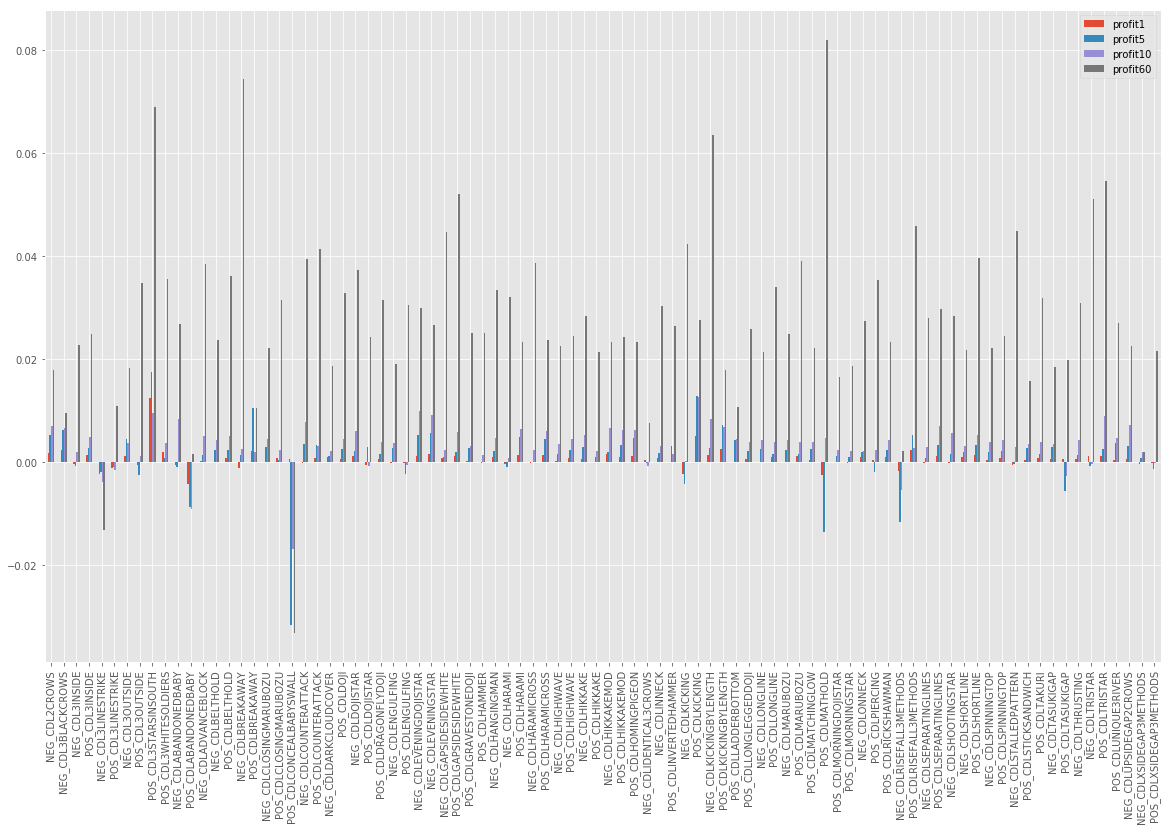

In [46]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 12)
(df - 1).plot.bar()  # 都在1附近
plt.show()

### 看不同天數的報酬相關性

In [47]:
df.corr()  # 基本上正相關

,profit1,profit5,profit10,profit60
profit1,1.000000,0.592961,0.492165,0.244354
profit5,0.592961,1.000000,0.782723,0.292730
profit10,0.492165,0.782723,1.000000,0.504197
profit60,0.244354,0.292730,0.504197,1.000000


In [48]:
data.get("最高價").tail()

stock_id,0015,0050,0051,0052,0053,0054,0055,0056,0057,0058,...,9944,9945,9946,9949,9950,9951,9955,9958,9960,9962
date,,,,,,,,,,,,,,,,,,,,,
2019-07-15,NaN,83.35,33.14,56.15,35.83,22.63,18.58,27.23,52.70,47.00,...,17.80,42.30,21.30,9.44,13.70,80.4,19.85,70.0,31.7,10.65
2019-07-16,NaN,83.45,33.50,56.50,35.97,22.74,18.58,27.34,53.10,47.23,...,17.75,42.05,21.05,9.60,13.45,81.2,19.65,74.6,31.7,10.60
2019-07-17,NaN,83.25,33.45,56.00,35.74,22.86,18.50,27.25,52.55,47.02,...,17.80,41.75,21.15,10.55,13.35,81.6,18.80,80.1,31.8,10.50
2019-07-18,NaN,82.95,33.22,55.95,35.45,NaN,18.52,27.13,52.50,47.00,...,17.70,41.65,21.20,10.75,13.65,81.9,19.80,80.9,31.8,10.80
2019-07-19,NaN,83.45,33.50,56.95,36.14,22.60,18.59,27.17,53.25,47.07,...,17.85,42.20,21.00,11.20,13.55,82.2,19.75,79.7,NaN,10.75


In [57]:
# 開高低收成交量
high = data.get("最高價")
low = data.get("最低價")
open_ = data.get("開盤價")
close = data.get("收盤價")
volume = data.get("成交股數")

# 找到蠟燭型態
df = data.talib("CDLTRISTAR")
signals = (df > 0) & (volume.rolling(10).mean() > 100000)
signals = signals.unstack()
signals = signals[signals > 0]
signals.index.levels[0].name = 'stock_id'
signals = signals.reset_index()

In [58]:
signals

,stock_id,date,0
0,0015,2012-11-01,True
1,0050,2012-11-19,True
2,0052,2010-04-21,True
3,0055,2012-11-16,True
4,0061,2015-08-14,True
5,0061,2019-07-05,True
6,1101,2013-03-25,True
7,1102,2008-09-08,True
8,1102,2014-07-21,True
9,1102,2018-06-15,True


,open,high,close,low,volume
date,,,,,
2013-03-12,38.20,38.40,38.15,37.85,4543336.0
2013-03-13,38.50,38.65,38.50,38.15,3309613.0
2013-03-14,38.15,38.15,37.40,37.30,11637149.0
2013-03-15,37.60,37.70,36.65,36.65,10128955.0
2013-03-18,36.65,36.65,36.20,36.05,11454314.0
2013-03-19,36.50,37.05,36.75,36.25,7144924.0
2013-03-20,36.75,36.90,36.50,36.35,9292012.0
2013-03-21,36.50,36.90,36.50,36.35,9104464.0
2013-03-22,36.40,36.60,36.45,36.40,7471752.0


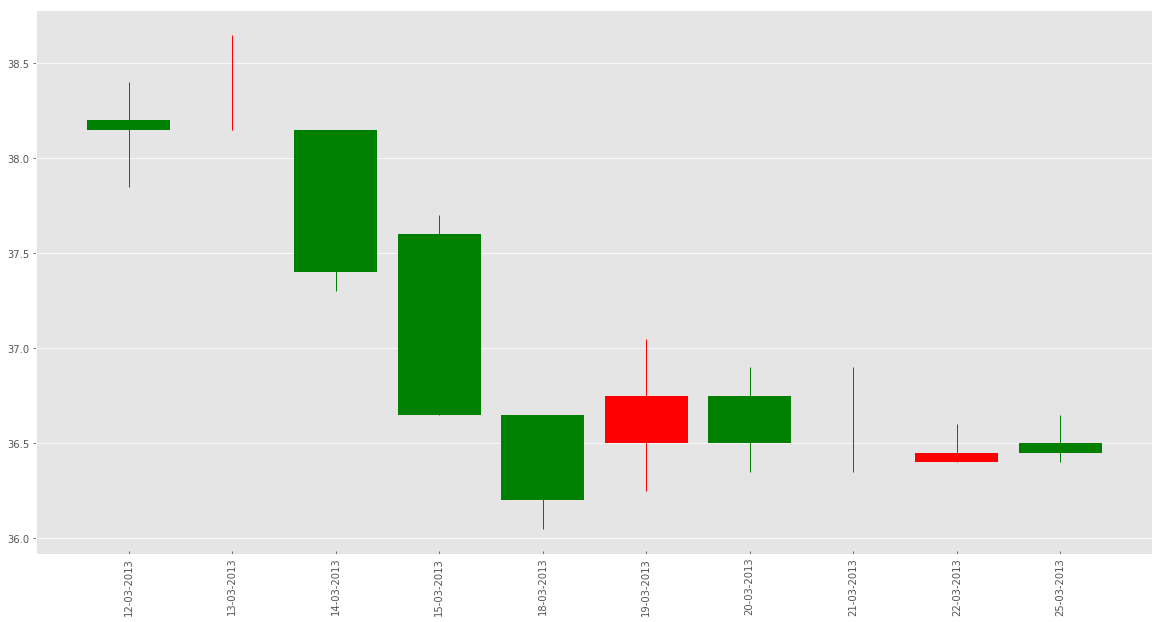

In [59]:

ind = 6
stock_id = signals['stock_id'].iloc[ind]
date = signals['date'].iloc[ind]

import matplotlib.pyplot as plt

o = open_[stock_id].loc[:date].tail(10)
h = high[stock_id].loc[:date].tail(10)
l = low[stock_id].loc[:date].tail(10)
c = close[stock_id].loc[:date].tail(10)
v = volume[stock_id].loc[:date].tail(10)

df = pd.DataFrame({'open':o, 'high':h, 'close':c, 'low':l, 'volume':v}).dropna(how='all')

from finlab.plot_candles import plot_candles
plot_candles(start_time=o.index[0], end_time=o.index[-1], pricing=df,)

df

In [2]:
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier
X = [[0, 0], [1, 1], [1, 0], [0, 1]]
y = [0, 0, 1, 1]
rbf_feature = RBFSampler(gamma=1, random_state=1)
X_features = rbf_feature.fit_transform(X)
clf = SGDClassifier(max_iter=5, tol=1e-3)
clf.fit(X_features, y)

clf.score(X_features, y)


/home/rossleecooloh/.pyenv/versions/3.6.6/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


1.0

In [4]:
X_features

array([[ 0.09317615, -0.06236118, -0.06751522, -0.13473764, -0.10436174,
        -0.11979075, -0.1151801 , -0.05810292, -0.10191676, -0.12805527,
         0.13950975, -0.06197658,  0.04490839, -0.12668634, -0.07827094,
         0.04170145,  0.10309069,  0.11638538, -0.07372585, -0.01790838,
        -0.00210292,  0.08660647, -0.13928258,  0.04552382, -0.12700477,
        -0.01495117, -0.14041357,  0.01850375, -0.12839064, -0.1381517 ,
        -0.07778379,  0.12863123, -0.10182033,  0.1240882 ,  0.14059795,
         0.05891447,  0.0535927 ,  0.0999759 , -0.053369  , -0.12815251,
         0.07504712, -0.13837025, -0.07961699,  0.02208811, -0.11819522,
        -0.0539306 ,  0.12231373,  0.11923215, -0.00632304,  0.10846049,
         0.04960405, -0.14142087, -0.01897091,  0.03672174,  0.00174729,
         0.08432265, -0.12210947, -0.10508561,  0.01448842,  0.11337608,
        -0.14072002, -0.13996518,  0.08119319, -0.10198644, -0.1360488 ,
        -0.08012341,  0.08699688,  0.00135756,  0.0

In [19]:
from sklearn.gaussian_process.kernels import RBF
print(RBF()([[1, 2, 3, 4], [1, 4, 5, 6]]))

print(np.std([[1, 2, 3, 4], [1, 4, 5, 6]], ddof=1))

# k(x_i, x_j) = exp(-1 / 2 d(x_i / length_scale, x_j / length_scale)^2)
a = np.array([1,2,3,4])
b = np.array([1,4,5,6])

np.exp(- 1 / (2) * (a.dot(a) + b.dot(b) - 2 * a.dot(b)))

array([[1.        , 0.00247875],
       [0.00247875, 1.        ]])

1.8322507626258087


0.0024787521766663585